<h1>Linear Regression Project with Python</h1>


<p>I have acquired a dataset containing hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. The challenge is to predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.</p>

In [1]:
#Import Modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import plotly.express as px
import numpy as np
import plotnine
from sklearn.linear_model import LinearRegression

Read in the data, which I'll assign to the variable 'df'.

In [3]:
df = pd.read_csv("Data/bikeshare.csv")

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


<h2>Exploratory Data Analysis</h2>

In [5]:
#Get Column names
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
#Get data types
print(df.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


In [8]:
#Find NULL values
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

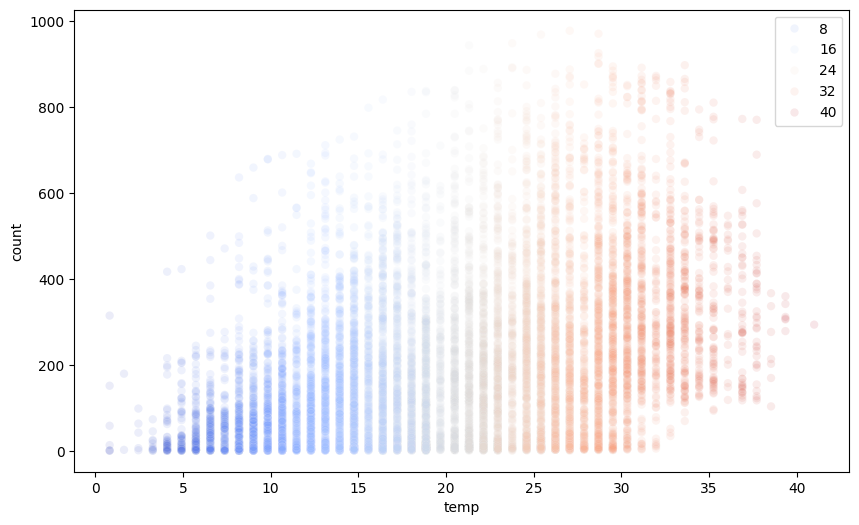

In [9]:
#visualise the tempreture vs rental count
fig = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="temp",
    y="count",
    hue="temp", #Colour points based on tempreture
    palette="coolwarm", # Choose suitable colour palette
    alpha=0.1 #Set transparency
)
plt.legend()
plt.show()

In [10]:
#convert datetime column into a datetime data type.
df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
print(df.dtypes)

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object


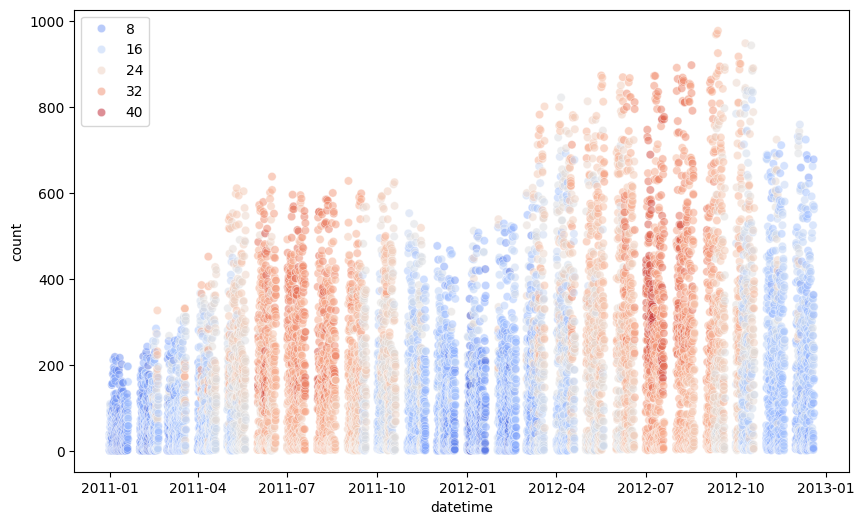

In [13]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="datetime",
    y="count",
    hue="temp", #Colour points based on tempreture
    palette="coolwarm", # Choose suitable colour palette
    alpha=0.5 #Set transparency
)
plt.legend()
plt.show()

As you can see, theres a clear difference ints bike rentals between the seasons, with more bikes being hired as the day to day tempreture goes up. Also overall the two year time period we can see that the over bike rentals are increasing.

I'll look at the correlation between tempreture and count.

<Figure size 800x800 with 0 Axes>

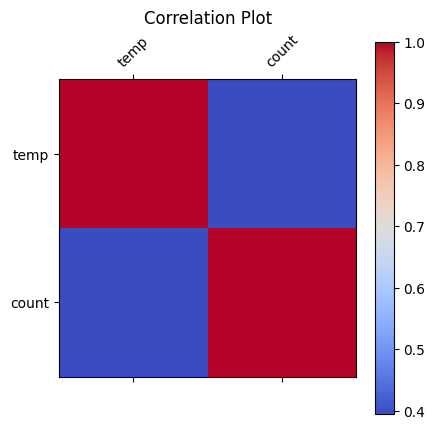

In [14]:
#Calculate the correlation matrix
corr_data = df[['temp','count']].corr()

#Create and display the correlation matrix
plt.figure(figsize=(8,8))
corrplot = plt.matshow(corr_data, cmap='coolwarm')
plt.colorbar()

#Add labels & title
plt.xticks(range(len(corr_data.columns)), corr_data.columns, rotation=45)
plt.yticks(range(len(corr_data.columns)), corr_data.columns)
plt.title('Correlation Plot')

plt.show()

Now I'll explore the seasonal data, using boxplot.

<ipython-input-15-5f222621022b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



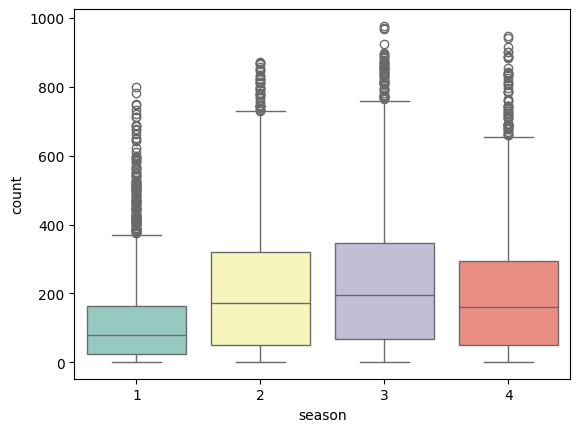

In [15]:
sns.boxplot(x='season', y='count', data=df, palette='Set3')
plt.show()

The box plot shows that there are less rentals in spring (1) then in Winter (4).

<h2>Feature Engineering</h2>
I will engineer an hour column which will be created from the hour in the datetime column.

In [16]:
df['hour'] = df['datetime'].apply(lambda x: pd.Timestamp(x).hour)

In [17]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


<ipython-input-18-2757d48aea65>:3: UserWarning: FixedFormatter should only be used together with FixedLocator


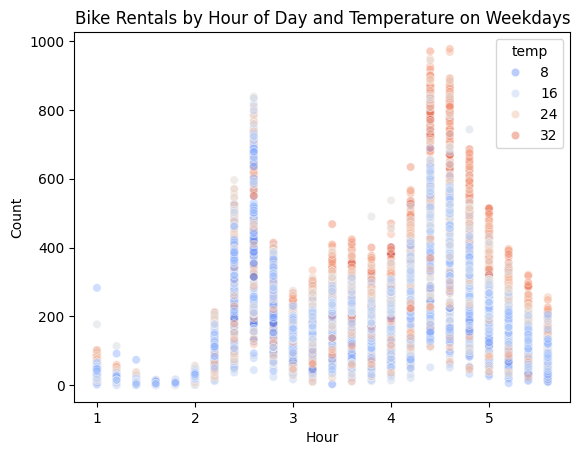

In [18]:
#Visualise Bike rentals by hour and temperature on week days
pl = sns.scatterplot(x='hour', y='count', hue='temp', data=df[df['workingday'] == 1], alpha=0.5, palette='coolwarm')
pl.set(title='Bike Rentals by Hour of Day and Temperature on Weekdays', xlabel='Hour', ylabel='Count')
pl.set_xticklabels(range(24))
plt.show()

<ipython-input-23-f35f5f384cdd>:3: UserWarning: FixedFormatter should only be used together with FixedLocator


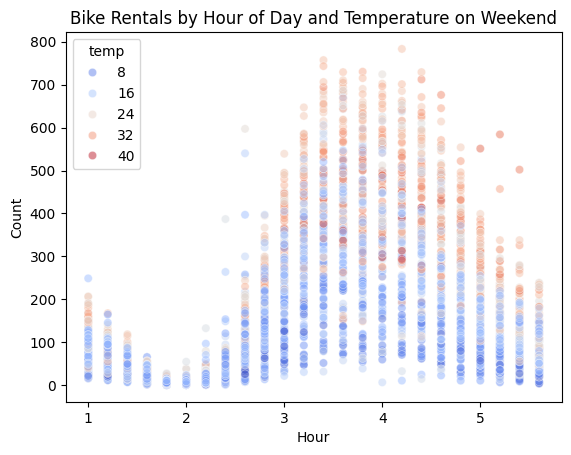

In [23]:
#Visualise bike rentals by hour and temperature on weekends
pl = sns.scatterplot(x='hour', y='count', hue='temp', data=df[df['workingday']==0], alpha=0.5, palette='coolwarm')
pl.set(title='Bike Rentals by Hour of Day and Temperature on Weekend', xlabel='Hour', ylabel='Count')
pl.set_xticklabels(range(24))
plt.show()

We can see from both graphs that during the week there is a spike between 7am and 10am and then again between 5pm and 7pm. Where the weekend rentals begin increasing from 7am and doesn't start decreasing until around 6pm.

<h2>Build the Model</h2>
I wlil first build a test model to predict count based on tempreture.

In [25]:
#Train the model
temp_model = LinearRegression().fit(df[['temp']], df['count'])

print(f"The intercept is {temp_model.intercept_:.2f} and the slope is {temp_model.coef_[0]:.2f}")

The intercept is 6.05 and the slope is 9.17


In [28]:
r_sq = temp_model.score(df[['temp']], df['count'])
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.15559367802794855


In [30]:
print(f"intercept: {temp_model.intercept_}")

intercept: 6.046212959616611


In [31]:
print(f"slope: {temp_model.coef_}")

slope: [9.17054048]


The model has produced a intercept of 6.05 and a slope of 9.17. The model has found that when temperature (x) is 0 degrees celsius there will be 6 bike rentals and that for every 1 degree on temperature increase will increase the bike rentals by 9.1.

Using this prediction, how many bike rentals would there be if the temperature was 25 degrees celsius?

In [26]:
#Y (SER) + X(SER)*25 degrees
6.05 + 9.17*25

235.3

I will now build a model using the following features:
<ul>
<li>season</li>
<li>holiday</li>
<li>workingday</li>
<li>weather</li>
<li>temp</li>
<li>humidity</li>
<li>windspeed</li>
<li>hour</li>
</ul>

In [27]:
df['hour'] = pd.to_numeric(df['hour'])

In [38]:
model = temp_model.predict(df[['temp']])
print(f"predicted response: \n{model}")

predicted response: 
[ 96.2843313   88.7644881   88.7644881  ... 133.88354727 133.88354727
 126.36370408]


<h2>Explore the Results</h2>

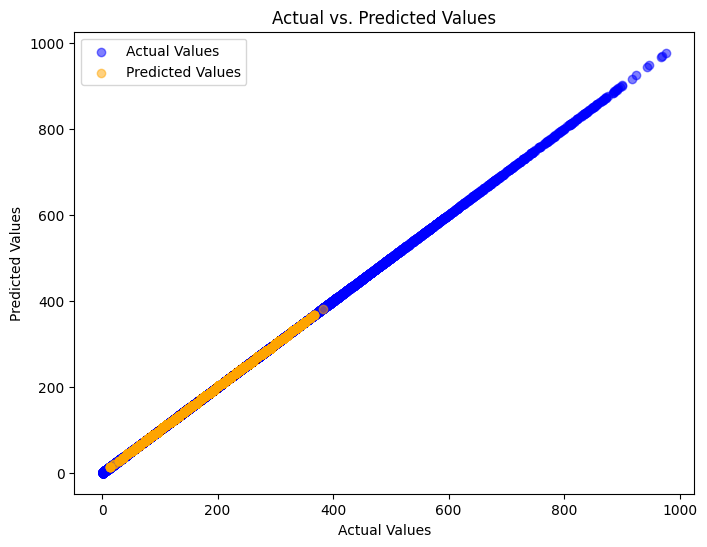

In [52]:
#Visualise actual vs predicted results
plt.figure(figsize=(8,6))
plt.scatter(df['count'], df['count'], alpha=0.5, label='Actual Values', c='blue')
plt.scatter(model, model, alpha=0.5, label='Predicted Values', c='orange')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()

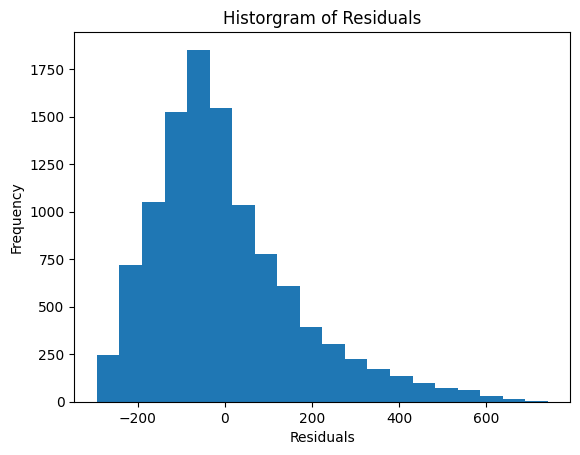

In [56]:
#Visualise residuals
residuals = df['count'] - model
plt.hist(residuals, bins = 20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title("Historgram of Residuals")
plt.show()

The histogram above shows the distribution of the residuals which should be normally distributed if the model is a good fit for the data.

The residuals are the differences between the actual data values and the predicted values. They are used to evaluate how well the regression line fits the data.

A right-skewed histogram can occur when there are a few extreme values that are much larger than the rest of the data. These extreme values can cause the mean to be larger than the median, which can shift the peak of the histogram to the right 1.

It’s important to note that a right-skewed histogram does not necessarily indicate that there is a problem with the data or the analysis.